<a href="https://colab.research.google.com/github/Devacodes-dev/Machine-learning-journey/blob/main/Rainfall_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 🌧️ Step 1: Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score
import requests
from datetime import date
import kagglehub

In [ ]:
import os
import kagglehub

# Download dataset
path = kagglehub.dataset_download("developerghost/climate-in-india-daily-weather-data-2000-2024")
print("Dataset folder:", path)

# List all files inside folder
os.listdir(path)

Using Colab cache for faster access to the 'climate-in-india-daily-weather-data-2000-2024' dataset.
Dataset folder: /kaggle/input/climate-in-india-daily-weather-data-2000-2024


['india_2000_2024_daily_weather.csv']

In [ ]:
# 🌧️ Step 2: Load historical weather dataset from Kaggle
path = kagglehub.dataset_download("developerghost/climate-in-india-daily-weather-data-2000-2024")
print("✅ Dataset path:", path)

# Adjust file name as needed
df = pd.read_csv(path + "/india_2000_2024_daily_weather.csv")
df.head()

Using Colab cache for faster access to the 'climate-in-india-daily-weather-data-2000-2024' dataset.
✅ Dataset path: /kaggle/input/climate-in-india-daily-weather-data-2000-2024


,city,date,temperature_2m_max,temperature_2m_min,apparent_temperature_max,apparent_temperature_min,precipitation_sum,rain_sum,weather_code,wind_speed_10m_max,wind_gusts_10m_max,wind_direction_10m_dominant
0,Delhi,2000-01-01,19.9,7.4,19.2,5.8,0.0,0.0,0,10.9,13.3,58
1,Delhi,2000-01-02,20.0,5.5,18.9,3.4,0.0,0.0,3,9.5,14.8,326
2,Delhi,2000-01-03,20.1,6.3,18.2,4.3,0.0,0.0,0,10.0,23.8,309
3,Delhi,2000-01-04,19.8,6.4,18.5,4.2,0.0,0.0,0,8.6,18.7,311
4,Delhi,2000-01-05,19.4,5.3,17.7,3.2,0.0,0.0,0,9.4,20.2,322


In [ ]:
# 🌧️ Step 3: Clean dataset
df = df.dropna()
df = df.rename(columns={'precipitation_sum': 'Rainfall_mm'})

# Select features
features = ['temperature_2m_max', 'temperature_2m_min', 'wind_speed_10m_max']
X = df[features]
y = df['Rainfall_mm']

print("Columns:", df.columns)
print("Features shape:", X.shape)
print("Target shape:", y.shape)

Columns: Index(['city', 'date', 'temperature_2m_max', 'temperature_2m_min',
       'apparent_temperature_max', 'apparent_temperature_min', 'Rainfall_mm',
       'rain_sum', 'weather_code', 'wind_speed_10m_max', 'wind_gusts_10m_max',
       'wind_direction_10m_dominant'],
      dtype='object')
Features shape: (91320, 3)
Target shape: (91320,)


In [ ]:
# 🌧️ Step 4: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# 🌧️ Step 5: Train Random Forest model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127783 (\N{CLOUD WITH RAIN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


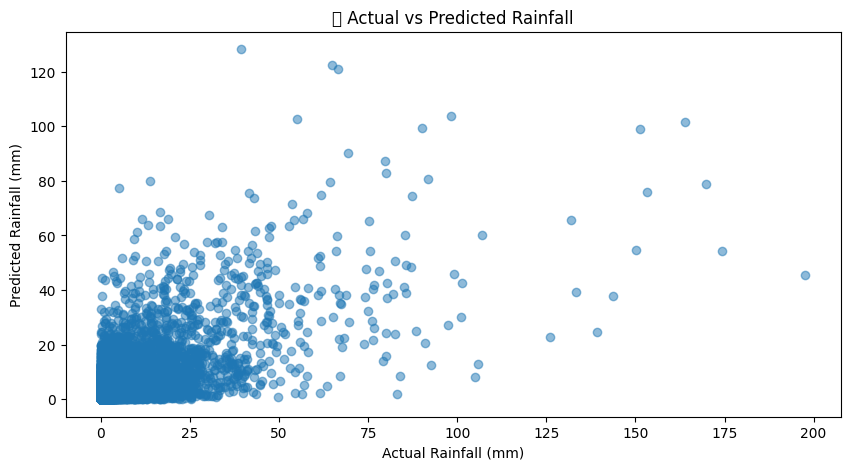

In [ ]:
# 🌧️ Step 7: Scatter plot of actual vs predicted rainfall
plt.figure(figsize=(10,5))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual Rainfall (mm)")
plt.ylabel("Predicted Rainfall (mm)")
plt.title("🌧️ Actual vs Predicted Rainfall")
plt.show()


In [ ]:
# 🌧️ Step 9: Fetch live weather for Chennai
lat, lon = 13.0827, 80.2707  # Chennai coordinates
url = f"https://api.open-meteo.com/v1/forecast?latitude={lat}&longitude={lon}&current_weather=true"

response = requests.get(url)
data = response.json()

if "current_weather" in data:
    current = data["current_weather"]
    temp = current["temperature"]
    wind = current["windspeed"]
    print("🌡️ Temperature:", temp)
    print("💨 Wind Speed:", wind)
else:
    print("Failed to fetch live data.")
    temp, wind = None, None

🌡️ Temperature: 28.9
💨 Wind Speed: 7.2


In [ ]:
# 🌧️ Step 10: Prepare live input for model
live_data = pd.DataFrame([{
    "temperature_2m_max": temp,
    "temperature_2m_min": temp,  # Using the same temperature for min and max for simplicity
    "wind_speed_10m_max": wind
}])

# Predict rainfall
live_pred = model.predict(live_data)[0]
print(f"\n🌧️ Predicted Rainfall for {date.today()} in Chennai: {live_pred:.2f} mm")


🌧️ Predicted Rainfall for 2025-10-26 in Chennai: 79.12 mm


In [ ]:
# 🌧️ Step 11: Interpret the prediction
if live_pred < 0.5:
    print("☀️ Low chance of rain — enjoy the day!")
elif live_pred < 3:
    print("🌦️ Light rain possible — carry an umbrella just in case.")
else:
    print("⛈️ Heavy rainfall expected — stay prepared!")

⛈️ Heavy rainfall expected — stay prepared!


In [ ]:
# 🌧️ Step 6: Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("📏 Mean Absolute Error:", mae)
print("🎯 R-squared:", r2)

📏 Mean Absolute Error: 2.7809352811976376
🎯 R-squared: 0.4282041528652858


/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127783 (\N{CLOUD WITH RAIN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


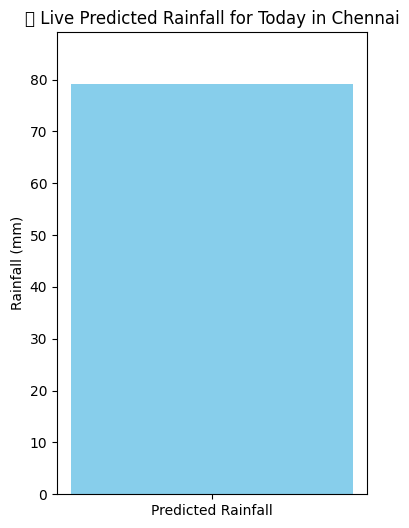

In [ ]:
# 🌧️ Step 12: Visualize the live prediction
plt.figure(figsize=(4, 6))
plt.bar(['Predicted Rainfall'], [live_pred], color='skyblue')
plt.ylabel("Rainfall (mm)")
plt.title("🌧️ Live Predicted Rainfall for Today in Chennai")
plt.ylim(0, max(live_pred + 10, 50)) # Adjust y-axis limit based on prediction
plt.show()